In [188]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

In [189]:
dfs = [pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')]

dfs

[                     track_id  \
 0      6f807x0ima9a1j3VPbc7VN   
 1      0r7CVbZTWZgbTCYdfa2P31   
 2      1z1Hg7Vb0AhHDiEmnDE79l   
 3      75FpbthrwQmzHlBJLuGdC7   
 4      1e8PAfcKUYoKkxPhrHqw4x   
 ...                       ...   
 32828  7bxnKAamR3snQ1VGLuVfC1   
 32829  5Aevni09Em4575077nkWHz   
 32830  7ImMqPP3Q1yfUHvsdn7wEo   
 32831  2m69mhnfQ1Oq6lGtXuYhgX   
 32832  29zWqhca3zt5NsckZqDf6c   
 
                                               track_name      track_artist  \
 0      I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran   
 1                        Memories - Dillon Francis Remix          Maroon 5   
 2                        All the Time - Don Diablo Remix      Zara Larsson   
 3                      Call You Mine - Keanu Silva Remix  The Chainsmokers   
 4                Someone You Loved - Future Humans Remix     Lewis Capaldi   
 ...                                                  ...               ...   
 32828               City Of Lights -

In [190]:
data = pd.concat(dfs, axis=0).dropna(axis = 0)

In [191]:
data.head(5)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [192]:
explorationDF = data[:1000]

In [193]:
explorationDF

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.10200,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.07240,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.07940,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.02870,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.08030,0.000000,0.0833,0.725,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0ZX44GyxjAWC4dbi9MmiUS,Dancing By Yourself,Junior Sanchez,40,7BlAaka3ZPQmnfzF0GsVEE,Dancing By Yourself,2019-06-14,Pop Dance Hits,7eERKCkgNKCCx5GYdeMIZf,pop,...,10,-7.174,0,0.0751,0.01900,0.000696,0.0554,0.720,123.004,185041
996,323eANs4Kha72cH6LjR10A,Hurt U,EAUXMAR,40,4o3G5jkb2iGQPzIsXiLYa3,Hurt U,2019-01-18,Pop Dance Hits,7eERKCkgNKCCx5GYdeMIZf,pop,...,1,-7.608,0,0.0419,0.34900,0.002150,0.1350,0.223,114.013,187368
997,3ODZO5cBfM9S0wQSMhBSjg,It Ain't Over,Funk Machine,25,2FCnRxbazceZaXT3Kma6i2,It Ain't Over,2019-06-07,Pop Dance Hits,7eERKCkgNKCCx5GYdeMIZf,pop,...,8,-5.182,1,0.0349,0.00363,0.000000,0.0659,0.397,80.059,183375
998,1RbgdZhU9FOKFbDZZKOMrv,Shadows (feat. Veronica),Adam K,44,2qrOPZcexgBsPApRmUSY66,Shadows (feat. Veronica),2019-05-10,Pop Dance Hits,7eERKCkgNKCCx5GYdeMIZf,pop,...,6,-6.062,0,0.0435,0.10700,0.003720,0.2610,0.476,117.969,182034


Text(0.5, 0, 'Duration')

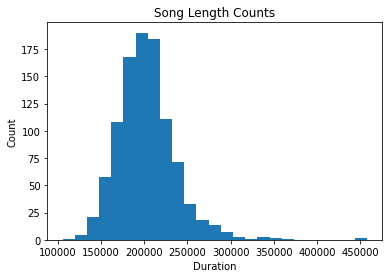

In [194]:
explorationDF.duration_ms.plot.hist(bins = 25)
plt.title("Song Length Counts")
plt.ylabel('Count')
plt.xlabel('Duration')

Text(0.5, 0, 'Track Popularity Score')

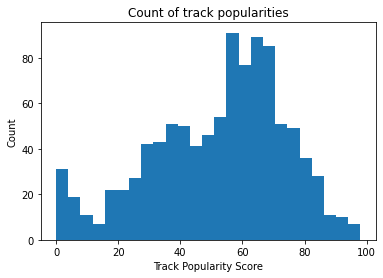

In [195]:
explorationDF.track_popularity.plot.hist(bins = 25)
plt.title("Count of track popularities")
plt.ylabel('Count')
plt.xlabel('Track Popularity Score')

The data is skewed towards having song popularities more towards the 75%

Text(0.5, 0, 'Tempo')

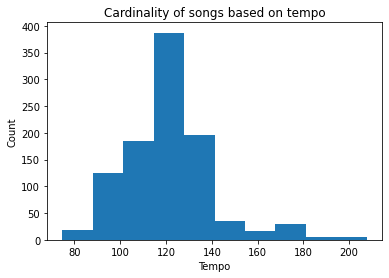

In [196]:
explorationDF.tempo.plot.hist()
plt.title("Cardinality of songs based on tempo")
plt.ylabel('Count')
plt.xlabel('Tempo')

Data is very skewed towards the 120 tempo range, there are not many songs that are a part of the other tempos

Text(0.5, 0, 'Key')

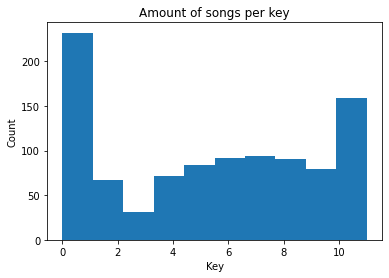

In [197]:
explorationDF.key.plot.hist()
plt.title("Amount of songs per key")
plt.ylabel('Count')
plt.xlabel('Key')

A lot of the songs in the dataset are having a key of 0 which means they are primarily in note of C during the song.

Text(0.5, 0, 'Date')

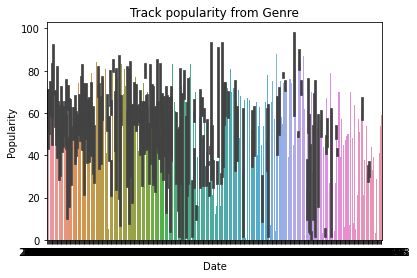

In [198]:
sns.barplot(x='track_album_release_date', y='track_popularity', data=explorationDF)
plt.title("Track popularity from Genre")
plt.ylabel('Popularity')
plt.xlabel('Date')

Text(0.5, 0, 'Loudness')

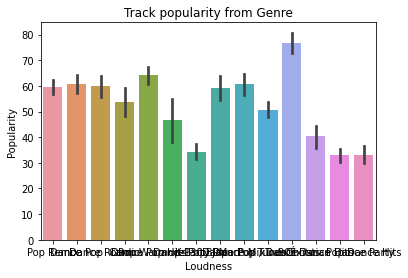

In [199]:
sns.barplot(x='playlist_name', y='track_popularity', data=explorationDF)
plt.title("Track popularity from Genre")
plt.ylabel('Popularity')
plt.xlabel('Loudness')

Text(0.5, 0, 'Genre')

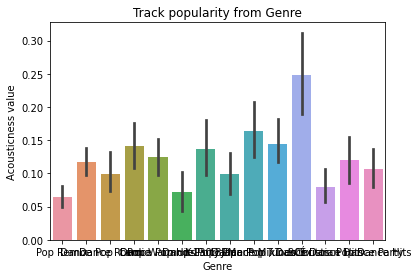

In [200]:
sns.barplot(x='playlist_name', y='acousticness', data=explorationDF)
plt.title("Track popularity from Genre")
plt.ylabel('Acousticness value')
plt.xlabel('Genre')

Text(0.5, 0, 'Tempo')

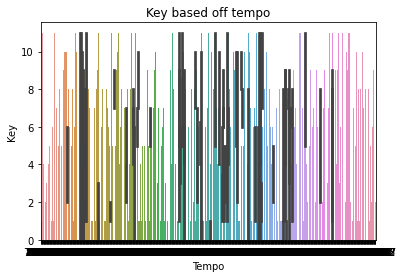

In [201]:
sns.barplot(x='tempo', y='key', data=explorationDF)
plt.title("Key based off tempo")
plt.ylabel('Key')
plt.xlabel('Tempo')

Text(0.5, 0, 'Loudness')

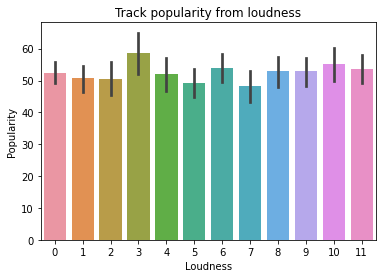

In [202]:
sns.barplot(x='key', y='track_popularity', data=explorationDF)
plt.title("Track popularity from loudness")
plt.ylabel('Popularity')
plt.xlabel('Loudness')

Text(0.5, 0, 'Loudness')

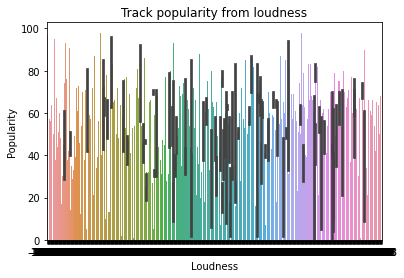

In [203]:
sns.barplot(x='loudness', y='track_popularity', data=explorationDF)
plt.title("Track popularity from loudness")
plt.ylabel('Popularity')
plt.xlabel('Loudness')

In [204]:
data.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [205]:
def preprocessInputs(df):
    df = df.copy()
    df = df.drop(['track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name', 
                 'track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre'], axis=1)
    
    # Split the track_popularity, that's what I'm trying to predict
    y = df['track_popularity']
    X = df.drop('track_popularity', axis = 1)
    
    #Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= .8, test_size = .2, random_state = 1)
    
    #Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns = X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns = X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [206]:
X_train, X_test, y_train, y_test = preprocessInputs(data)
X_train

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
20537,1.759273,1.383237,-1.212428,0.403620,0.875004,0.650009,2.350051,-0.378215,0.511824,1.785318,-1.014709,1.098202
19090,0.122039,-0.027488,1.273407,0.904816,0.875004,0.581062,1.743248,-0.378215,-0.470721,1.155227,2.062578,-0.381113
18907,1.532262,1.078963,0.168591,0.294955,0.875004,0.157532,0.041461,-0.378215,-0.554754,0.735167,-0.032290,-0.383329
32214,-1.432646,0.459350,-0.383816,0.081303,-1.142852,0.610610,-0.710884,0.714106,1.811110,-2.032087,0.349153,-0.896256
17766,0.624216,-0.381552,0.720999,0.055558,0.875004,-0.776204,-0.766089,-0.378215,-0.647837,-0.344988,-0.700694,-0.175415
...,...,...,...,...,...,...,...,...,...,...,...,...
21445,1.601053,-0.979036,-1.212428,-0.742209,0.875004,3.181339,-0.764310,-0.378215,-0.941308,0.482274,0.868894,-1.708213
7813,1.202063,-0.265375,0.997203,-0.956530,-1.142852,1.083388,-0.794636,-0.232424,-0.108731,0.233667,0.542307,0.629541
32516,-1.343218,0.990447,-0.383816,0.505932,-1.142852,-0.623536,-0.697652,1.886679,-0.218620,-0.242116,0.270425,-0.236864
5192,0.197709,-0.376020,-1.488632,-0.009975,-1.142852,-0.681648,0.598078,-0.377993,-0.567682,0.075073,-1.078844,-0.894873


In [207]:
y_train

20537    33
19090    70
18907    68
32214    38
17766    51
         ..
21445    74
7813     25
32516    47
5192     40
12175    46
Name: track_popularity, Length: 26262, dtype: int64

In [208]:
X_train.mean()

danceability        1.442622e-15
energy              3.256181e-16
key                -3.463159e-17
loudness           -1.373088e-16
mode               -2.516201e-17
speechiness        -2.218586e-17
acousticness        1.425847e-16
instrumentalness   -1.068709e-17
liveness            4.870067e-18
valence             2.429622e-16
tempo               3.192599e-16
duration_ms         1.938557e-16
dtype: float64

In [209]:
X_train.var()

danceability        1.000038
energy              1.000038
key                 1.000038
loudness            1.000038
mode                1.000038
speechiness         1.000038
acousticness        1.000038
instrumentalness    1.000038
liveness            1.000038
valence             1.000038
tempo               1.000038
duration_ms         1.000038
dtype: float64

In [210]:
# Time to train the models

In [211]:
models = {
    "Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "Support Vector Machine (RBF Kernel)": SVC(),
    "Neural Network": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [212]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

Linear Regression trained.
Logistic Regression trained.
K-Nearest Neighbors trained.
Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.
Neural Network trained.
Random Forest trained.
Gradient Boosting trained.


In [213]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))
    y_pred = model.predict(X_test)
    print("Mean Absolute Error = ", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error = ", mean_squared_error(y_test, y_pred))
    print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("r^2 = ", r2_score(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print()

Linear Regression: 7.20%
Mean Absolute Error =  20.180292886898823
Mean Squared Error =  582.0521935359664
RMSE =  24.125757885214018
r^2 =  0.07199004365983208

Logistic Regression: 7.97%
Mean Absolute Error =  41.322113920194944
Mean Squared Error =  2339.5834602497716
RMSE =  48.36924084839219
r^2 =  -2.730175350101844

K-Nearest Neighbors: 10.95%
Mean Absolute Error =  28.227078891257996
Mean Squared Error =  1291.743679561377
RMSE =  35.94083582168585
r^2 =  -1.0595249171556769

Decision Tree: 21.50%
Mean Absolute Error =  20.81449893390192
Mean Squared Error =  855.4876637222053
RMSE =  29.24872071941276
r^2 =  -0.36396886443713594

Support Vector Machine (Linear Kernel): 8.03%
Mean Absolute Error =  40.605848309473046
Mean Squared Error =  2282.6859579652755
RMSE =  47.77746286655744
r^2 =  -2.6394593469713845

Support Vector Machine (RBF Kernel): 8.53%
Mean Absolute Error =  41.86765153822723
Mean Squared Error =  2387.4287237282974
RMSE =  48.86132134652416
r^2 =  -2.806458682

In [214]:
# Model is producing rather bad results. So I'm going to change the data. 
# I will add a target column to the dataframe, where if the track_popularity is >= 50, the target = 1 (popular) 
# otherwise 0 (unpopular)

data['Target'] = np.where(data['track_popularity'] >= 50, 1, 0)

In [215]:
# Redefine Function to drop 'Target column'

def preprocessInputs(df):
    df = df.copy()
    df = df.drop(['track_id', 'track_popularity', 'track_name', 'track_artist', 'track_album_id', 'track_album_name', 
                 'track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre'], axis=1)
    
    # Split the track_popularity, that's what I'm trying to predict
    y = df['Target']
    X = df.drop('Target', axis = 1)
    
    #Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= .2, test_size = .2, random_state = 1)
    
    #Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns = X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns = X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [216]:
X_train, X_test, y_train, y_test = preprocessInputs(data)

In [217]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

Linear Regression trained.
Logistic Regression trained.
K-Nearest Neighbors trained.
Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.
Neural Network trained.
Random Forest trained.
Gradient Boosting trained.


In [218]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))
    y_pred = model.predict(X_test)
    print("Mean Absolute Error = ", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error = ", mean_squared_error(y_test, y_pred))
    print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("r^2 = ", r2_score(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print()

Linear Regression: 4.80%
Mean Absolute Error =  0.47055578762812056
Mean Squared Error =  0.23502630833951574
RMSE =  0.48479511996256286
r^2 =  0.047998019946730364

Logistic Regression: 59.76%
Mean Absolute Error =  0.4023758757234237
Mean Squared Error =  0.4023758757234237
RMSE =  0.6343310458454826
r^2 =  -0.6298712817332806

K-Nearest Neighbors: 57.86%
Mean Absolute Error =  0.42141334145598536
Mean Squared Error =  0.42141334145598536
RMSE =  0.6491635706476337
r^2 =  -0.7069847980908355

Decision Tree: 57.49%
Mean Absolute Error =  0.4250685348766372
Mean Squared Error =  0.4250685348766372
RMSE =  0.6519728022522391
r^2 =  -0.7217905932314861

Support Vector Machine (Linear Kernel): 59.70%
Mean Absolute Error =  0.40298507462686567
Mean Squared Error =  0.40298507462686567
RMSE =  0.6348110542727384
r^2 =  -0.6323389142567224

Support Vector Machine (RBF Kernel): 60.89%
Mean Absolute Error =  0.3911056960097472
Mean Squared Error =  0.3911056960097472
RMSE =  0.625384438573384